# Neural Networks

## 1. What are Neurons?

Each neuron is a mathematical operation that takes it's input, multiplies it by it's weights and then passes the sum through the activation function to the other neurons.

## 2. Explain the architecture of a neural network

Neural Network mimics the behavior of the human brain to solve complex data-driven problems

The input data is processed through different layers of artificial neurons stacked together to produce the desired output.

The Neural Network architecture is made of individual units called neurons that mimic the biological behavior of the brain. 
The various components of a neuron are inputs, weight, transfer function, activation function, bias etc.
These components are there in different layers of neural network like input layer, hidden layer, output layer

## 3. How many parameters are there in a neural network with 4 hidden layers having 30,25,20,15 neurons each and the input and output layer having 50 and 1 neuron respectively

50*30 + 30*25 + 25*20 + 20*15 =1500 + 750 + 500 + 300 = 3150

## 4. Explain gradient descent

Gradient descent  is method which is iterative first-order optimisation used to find a local minimum/maximum of any given function.
This algorithm is used to minimise a cost/loss function. For e.g. in a linear regression



## 5. What is categorical cross entropy

It is an loss function which is used for multi class classification. Here an instance can belong to only out of many categories which is 
decided by model. It is` designed for quantify the the difference between two 
probability distributions.





## 6. Explain in short the following terms: Relu, Sigmoid, softmax

Relu- It stand for rectified linear unit. It is a piecewise linear function which will produce output if input is positive else it will produce 
zero

Sigmoid is a mathematical function having a characteristic that can take any real value and map it to between 0 to 1

Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector.

## 7. Load the mnist dataset

In [65]:
!pip install tensorflow

In [66]:
!pip install keras

In [67]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#from sklearn.datasets import fetch_mldata
from keras.models import Sequential 
from keras.layers import Dense, Dropout


In [68]:
from keras.datasets import mnist

In [69]:
#mnist = fetch_mldata('MNIST original')

## 8. plot some sample images

In [70]:
mnist = pd.read_csv("train.csv")
mnist_test = pd.read_csv("test.csv")#test data set
#mnist_test.keys()
mnist

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 9. pre process the target variable to make it binary

In [71]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(mnist[['label']]).toarray())
# merge with main df bridge_df on key values
mnist=mnist.join(enc_df)
mnist

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,1,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41998,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [72]:
mnist=mnist.iloc[:,1:]
X=mnist.iloc[:,:784]
y=mnist.iloc[:,784:] #last 10 columns

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [74]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
X_train.shape

(31500, 784)

## 10. construct a neural network

In [76]:
# Build neural network in Keras
model = Sequential()
model.add(Dense(784, activation='relu', input_dim = 784))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## 11. plot the network (visualise/summarise)

In [77]:
#!pip install pydot
#from keras.utils.vis_utils import plot_model
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 784)               615440    
                                                                 
 dropout_1 (Dropout)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 858,202
Trainable params: 858,202
Non-tr

## 12. train the network

In [79]:
history=model.fit(X_train, y_train, epochs = 30)

Epoch 1/30
985/985 [==============================] - 12s 10ms/step - loss: 0.1875 - accuracy: 0.8738
Epoch 2/30
985/985 [==============================] - 11s 12ms/step - loss: 0.0393 - accuracy: 0.9428
Epoch 3/30
985/985 [==============================] - 11s 11ms/step - loss: 0.0317 - accuracy: 0.9540
Epoch 4/30
985/985 [==============================] - 10s 10ms/step - loss: 0.0269 - accuracy: 0.9594
Epoch 5/30
985/985 [==============================] - 11s 11ms/step - loss: 0.0241 - accuracy: 0.9632
Epoch 6/30
985/985 [==============================] - 10s 10ms/step - loss: 0.0230 - accuracy: 0.9647
Epoch 7/30
985/985 [==============================] - 10s 11ms/step - loss: 0.0209 - accuracy: 0.9677
Epoch 8/30
985/985 [==============================] - 11s 11ms/step - loss: 0.0182 - accuracy: 0.9723
Epoch 9/30
985/985 [==============================] - 10s 10ms/step - loss: 0.0166 - accuracy: 0.9740
Epoch 10/30
985/985 [==============================] - 9s 10ms/step - loss: 0.0152

## 13. plot epoch vs accuracy curve

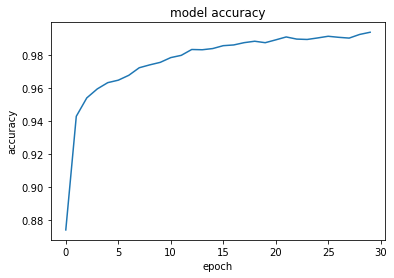

In [80]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

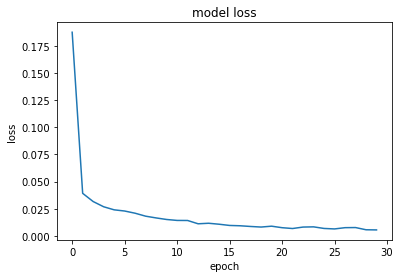

In [81]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

## 14. print the results

In [82]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss:', score[0])  
print('Test accuracy:', score[1])

Test loss: 0.029204783961176872
Test accuracy: 0.9762856960296631


In [83]:
y_test_pred=model.predict(X_test)

In [ ]:
y_test_pred

In [ ]:
pd.DataFrame(data=y_test_pred)

In [86]:
y_test.shape

(10500, 10)

In [95]:
y_test_true=enc.inverse_transform(y_test)
y_test_true

array([[5],
       [0],
       [2],
       ...,
       [3],
       [1],
       [1]], dtype=int64)

In [97]:
y_pred_true=enc.inverse_transform(y_test_pred)
y_pred_true

array([[5],
       [0],
       [2],
       ...,
       [3],
       [1],
       [1]], dtype=int64)

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_true,y_pred_true)

0.9762857142857143

In [ ]:
#y_test_pred_ind=enc.categories_[np.argmax(i)]

In [ ]:
#y_test_pred = np.argmax(y_test_pred, axis = 0)

In [ ]:
#y_test_pred

In [ ]:
#y_test_pred = np.argmax(y_test_pred)
#y_test= np.argmax(y_test,axis = 1)
#from sklearn.metrics import accuracy_score
#accuracy_score(y_test, y_test_pred)

#My notes

We use validation accuracy for to validate that our model is overfitting or not before testing on test data. Validation data will be from the train data only but it is unseen.